## Excercise showing CNN - Exploring with epochs
### Problem with multiple input variables. 



###  Practicum #1 - Maggie Sleziak

<B> 
<BR>Daily Summary from the Station at the Denver International Airport. 
<BR>Data-range: January 1, 2010 to August 26, 2018. 
<BR>These are daily measurements of precipitation in inches, average wind speed in miles, 
<BR>snowfall in inches, snow depth in inches, maximum/ minimum temperature in FH
<BR>National Centers for Environmental Information,  NCEI. Climate Data Online. 
<BR>Retrieved from https://www.ncdc.noaa.gov/cdo-web/

<BR><BR>
Features: 
<B>

<br>
<br>


In [1]:

# - Load libraries
from pandas import read_csv
from datetime import datetime
from pandas import concat
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas import DataFrame
from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from datetime import datetime
%matplotlib inline
pyplot.rcParams['figure.figsize'] = [10, 5]

Using TensorFlow backend.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


<BR><BR>
<B>Load Data Already Prepared</B>

In [2]:
# Start time to time this process: 
startTime = datetime.now()

# Load dataset
dailyLag1 = pd.read_csv("./data/dailyTemp.csv")
print
print('Info:')
dailyLag1.info()
print
print('head:')
dailyLag1.head(10)


<function print>

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 4 columns):
date     3160 non-null object
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 98.8+ KB


<function print>

head:


,date,yTavg,hum,dewp
0,2010-01-01,26.0,59,13
1,2010-01-02,28.0,74,21
2,2010-01-03,26.0,80,23
3,2010-01-04,23.5,68,15
4,2010-01-05,33.0,52,21
5,2010-01-06,18.0,77,10
6,2010-01-07,-1.5,67,-9
7,2010-01-08,11.0,52,-2
8,2010-01-09,25.0,49,9
9,2010-01-10,32.0,55,16


In [3]:
## https://chrisalbon.com/python/basics/strings_to_datetime/

dailyLag1['date'] = pd.to_datetime(dailyLag1['date'], box=True)

In [4]:
dailyLag1.info()

# Change to datimeIndex
# https://www.programcreek.com/python/example/82175/pandas.DatetimeIndex
dailyLag1 = dailyLag1.set_index('date')

print(dailyLag1.head(10))
dailyLag1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 4 columns):
date     3160 non-null datetime64[ns]
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 98.8 KB
            yTavg  hum  dewp
date                        
2010-01-01   26.0   59    13
2010-01-02   28.0   74    21
2010-01-03   26.0   80    23
2010-01-04   23.5   68    15
2010-01-05   33.0   52    21
2010-01-06   18.0   77    10
2010-01-07   -1.5   67    -9
2010-01-08   11.0   52    -2
2010-01-09   25.0   49     9
2010-01-10   32.0   55    16
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160 entries, 2010-01-01 to 2018-08-26
Data columns (total 3 columns):
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: float64(1), int64(2)
memory usage: 98.8 KB


In [5]:
# Look for any NAs - we took them out in R, so just checking. 
print(dailyLag1.isna().any())

yTavg    False
hum      False
dewp     False
dtype: bool


In [6]:
# pd.set_option('precision', 1) 
print
print("Descriptions: ")
dailyLag1.describe()

<function print>

Descriptions: 


,yTavg,hum,dewp
count,3160.000000,3160.000000,3160.000000
mean,51.986709,49.882278,29.942405
std,18.462632,19.026266,14.157723
min,-10.000000,10.000000,-13.000000
25%,38.500000,34.000000,19.000000
50%,52.500000,47.000000,29.000000
75%,68.500000,64.000000,42.000000
max,88.000000,99.000000,60.000000


In [7]:
# Get columns with values from the dataset (not the date column)
values = dailyLag1.values
values = values.astype('float32')
print('After changing to float: ')

# Convert to float
floatDF = pd.DataFrame(values) 

print(np.isnan(floatDF).any())
print(np.isinf(floatDF).any())

print(floatDF.dtypes)
print(floatDF.shape)
floatDF.head(10)

After changing to float: 
0    False
1    False
2    False
dtype: bool
0    False
1    False
2    False
dtype: bool
0    float32
1    float32
2    float32
dtype: object
(3160, 3)


,0,1,2
0,26.0,59.0,13.0
1,28.0,74.0,21.0
2,26.0,80.0,23.0
3,23.5,68.0,15.0
4,33.0,52.0,21.0
5,18.0,77.0,10.0
6,-1.5,67.0,-9.0
7,11.0,52.0,-2.0
8,25.0,49.0,9.0
9,32.0,55.0,16.0


In [8]:
# Normalize features so all are from 0 to 1
## Scaling features. 
print
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print('After normalizing:')
print(scaled.shape)
print(scaled[:10,])
print

<function print>

After normalizing:
(3160, 3)
[[0.36734694 0.5505618  0.3561644 ]
 [0.3877551  0.7191011  0.46575344]
 [0.36734694 0.7865169  0.49315068]
 [0.34183672 0.65168536 0.38356164]
 [0.43877548 0.4719101  0.46575344]
 [0.28571427 0.75280905 0.31506848]
 [0.08673469 0.6404494  0.05479453]
 [0.2142857  0.4719101  0.15068494]
 [0.35714287 0.43820223 0.30136988]
 [0.4285714  0.505618   0.39726028]]


<function print>

<BR><BR>
    <B>Change to Supervised:</B>

In [9]:
# Code retrieved and adapted from:  Deep Learning for Time Series Forecasting by 
# Jason Brownlee

# Add time lags based on number features and number of lag hours
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
# specify the number of lag hours **This time is 3 hours** 
n_hours = 3
n_features = 3
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)
print(reframed.head())
print


(3157, 12)
   var1(t-3)  var2(t-3)  var3(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  \
3   0.367347   0.550562   0.356164   0.387755   0.719101   0.465753   
4   0.387755   0.719101   0.465753   0.367347   0.786517   0.493151   
5   0.367347   0.786517   0.493151   0.341837   0.651685   0.383562   
6   0.341837   0.651685   0.383562   0.438775   0.471910   0.465753   
7   0.438775   0.471910   0.465753   0.285714   0.752809   0.315068   

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)   var2(t)   var3(t)  
3   0.367347   0.786517   0.493151  0.341837  0.651685  0.383562  
4   0.341837   0.651685   0.383562  0.438775  0.471910  0.465753  
5   0.438775   0.471910   0.465753  0.285714  0.752809  0.315068  
6   0.285714   0.752809   0.315068  0.086735  0.640449  0.054795  
7   0.086735   0.640449   0.054795  0.214286  0.471910  0.150685  


<function print>

<BR><BR>
    <B>Split into train/test and input and output:</B>

In [11]:
# Split into train and test sets with X (features) and Y (output/target)
values = reframed.values
# Fit for 5 first years, the rest for validation: 
n_train_hours = 365 * 5
train = values[:n_train_hours, :]
print(train.shape)


(1825, 12)


In [12]:
# User remeinder for testing 
test = values[n_train_hours:, :]
print(test.shape)
print

(1332, 12)


<function print>

In [13]:
# split into input and outputs - remove extra lagged features
n_obs = n_hours * n_features
print ("Lags:", n_hours, " Original Features:", n_features, " Total Lagged Observations:",  n_obs)
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print('Shape for train_X, train_y, test_X, test_y:')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


Lags: 3  Original Features: 3  Total Lagged Observations: 9
Shape for train_X, train_y, test_X, test_y:
(1825, 9) (1825,) (1332, 9) (1332,)


<BR><BR>
<B> Design and Fit the CNN Model


In [14]:

# Exploring with different numbers of epochs, and neurons - for several iterations
# model is fit using the efficient Adam version of stochastic gradient descent
# optimized using the mean squared error, or ‘mse’, loss function.
# Define model: 
# Input shape is 3 time steps * 3 features so total 9 (x_features).
%matplotlib inline


def fit_model(train_X, train_y, test_X, test_y, batch_num, epoch_num, neurons):
    # define model
    modelCNN3 = Sequential()
    modelCNN3.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]))) 
    modelCNN3.add(MaxPooling1D(pool_size=2)) 
    modelCNN3.add(Flatten())
    modelCNN3.add(Dense(neurons, activation='relu')) 
    modelCNN3.add(Dense(1))
    modelCNN3.compile(optimizer='adam', loss='mse')
    history = modelCNN3.fit(train_X, train_y, epochs=epoch_num, batch_size=batch_num, validation_data=(test_X, test_y), verbose=2, shuffle=False)
   
    # The Train and test loss are printed at the end of each training epoch. 
    # If the test loss drops below training loss, the model may be overfitting the training data. 

    pyplot.rcParams['figure.figsize'] = [10, 5]
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()
    print("If the test loss drops below training loss, ")
    print("the model may be overfitting the training data. ")
    print ()
    return modelCNN3

Train on 1825 samples, validate on 1332 samples
Epoch 1/200
 - 0s - loss: 0.0790 - val_loss: 0.0115
Epoch 2/200
 - 0s - loss: 0.0105 - val_loss: 0.0073
Epoch 3/200
 - 0s - loss: 0.0087 - val_loss: 0.0068
Epoch 4/200
 - 0s - loss: 0.0082 - val_loss: 0.0065
Epoch 5/200
 - 0s - loss: 0.0079 - val_loss: 0.0063
Epoch 6/200
 - 0s - loss: 0.0077 - val_loss: 0.0061
Epoch 7/200
 - 0s - loss: 0.0075 - val_loss: 0.0060
Epoch 8/200
 - 0s - loss: 0.0074 - val_loss: 0.0059
Epoch 9/200
 - 0s - loss: 0.0074 - val_loss: 0.0059
Epoch 10/200
 - 0s - loss: 0.0074 - val_loss: 0.0059
Epoch 11/200
 - 0s - loss: 0.0073 - val_loss: 0.0058
Epoch 12/200
 - 0s - loss: 0.0073 - val_loss: 0.0058
Epoch 13/200
 - 0s - loss: 0.0076 - val_loss: 0.0064
Epoch 14/200
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 15/200
 - 0s - loss: 0.0070 - val_loss: 0.0057
Epoch 16/200
 - 0s - loss: 0.0072 - val_loss: 0.0058
Epoch 17/200
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 18/200
 - 0s - loss: 0.0069 - val_loss: 0.0057
Epoch 1

Epoch 154/200
 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 155/200
 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 156/200
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 157/200
 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 158/200
 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 159/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 160/200
 - 0s - loss: 0.0053 - val_loss: 0.0055
Epoch 161/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 162/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 163/200
 - 0s - loss: 0.0053 - val_loss: 0.0055
Epoch 164/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 165/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 166/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 167/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 168/200
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 169/200
 - 0s - loss: 0.0056 - val_loss: 0.0054
Epoch 170/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 171/200
 - 0s - loss: 0.0052 - val_loss: 0.0055
Epoch 172/200
 - 0s - loss: 

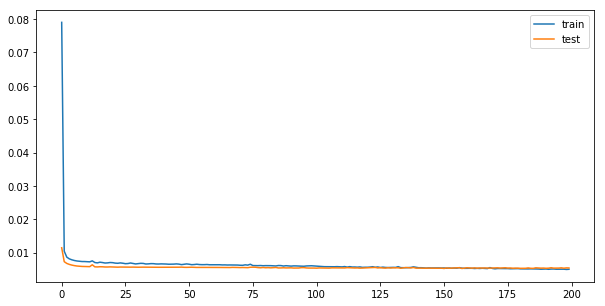

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


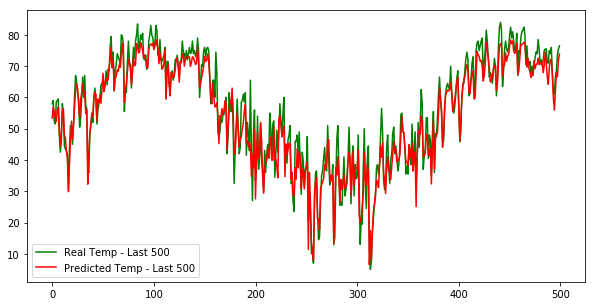

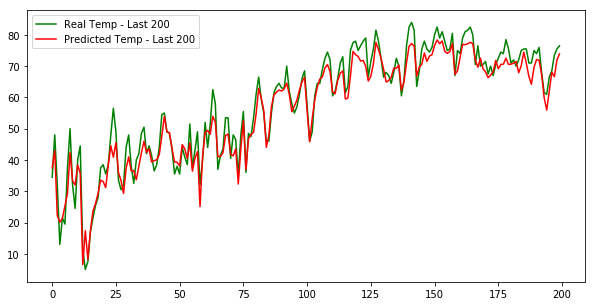

epoch_num: 200 neuron_num: 32
Test MSE: 52.177
Test RMSE: 7.223
Goodness of fit: 0.835
Mean Absolute Percentage Error: 15.013

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/200
 - 0s - loss: 0.0313 - val_loss: 0.0083
Epoch 2/200
 - 0s - loss: 0.0088 - val_loss: 0.0071
Epoch 3/200
 - 0s - loss: 0.0078 - val_loss: 0.0064
Epoch 4/200
 - 0s - loss: 0.0075 - val_loss: 0.0061
Epoch 5/200
 - 0s - loss: 0.0075 - val_loss: 0.0062
Epoch 6/200
 - 0s - loss: 0.0073 - val_loss: 0.0060
Epoch 7/200
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 8/200
 - 0s - loss: 0.0072 - val_loss: 0.0059
Epoch 9/200
 - 0s - loss: 0.0077 - val_loss: 0.0063
Epoch 10/200
 - 0s - loss: 0.0076 - val_loss: 0.0061
Epoch 11/200
 - 0s - loss: 0.0070 - val_loss: 0.0058
Epoch 12/200
 - 0s - loss: 0.0070 - val_loss: 0.0058
Epoch 13/200
 - 0s - loss: 0.0074 - val_loss: 0.0060
Epoch 14/200
 - 0s - loss: 0.0075 - val_loss: 0.0062
Epoch 15/20

Epoch 150/200
 - 0s - loss: 0.0057 - val_loss: 0.0056
Epoch 151/200
 - 0s - loss: 0.0056 - val_loss: 0.0054
Epoch 152/200
 - 0s - loss: 0.0056 - val_loss: 0.0054
Epoch 153/200
 - 0s - loss: 0.0056 - val_loss: 0.0056
Epoch 154/200
 - 0s - loss: 0.0056 - val_loss: 0.0057
Epoch 155/200
 - 0s - loss: 0.0056 - val_loss: 0.0055
Epoch 156/200
 - 0s - loss: 0.0056 - val_loss: 0.0055
Epoch 157/200
 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 158/200
 - 0s - loss: 0.0056 - val_loss: 0.0053
Epoch 159/200
 - 0s - loss: 0.0056 - val_loss: 0.0054
Epoch 160/200
 - 0s - loss: 0.0056 - val_loss: 0.0055
Epoch 161/200
 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 162/200
 - 0s - loss: 0.0055 - val_loss: 0.0053
Epoch 163/200
 - 0s - loss: 0.0056 - val_loss: 0.0055
Epoch 164/200
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 165/200
 - 0s - loss: 0.0055 - val_loss: 0.0053
Epoch 166/200
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 167/200
 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 168/200
 - 0s - loss: 

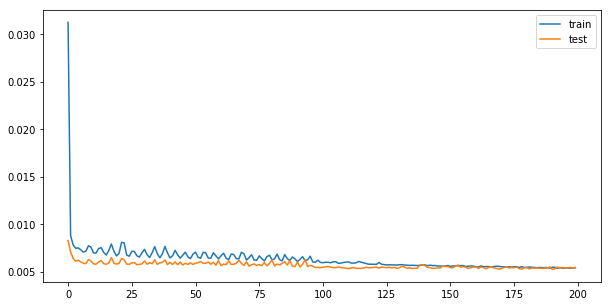

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


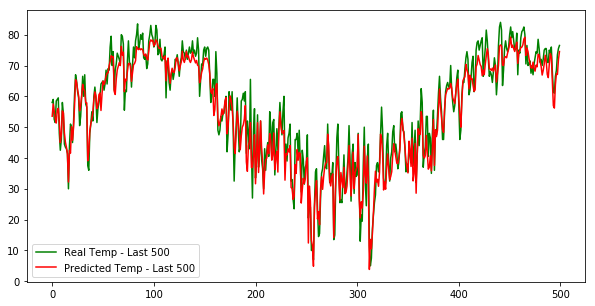

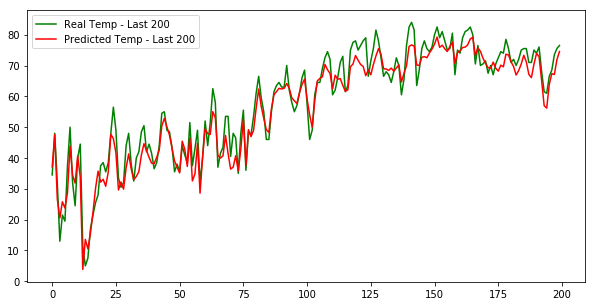

epoch_num: 200 neuron_num: 42
Test MSE: 52.377
Test RMSE: 7.237
Goodness of fit: 0.834
Mean Absolute Percentage Error: 14.798

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/200
 - 0s - loss: 0.0594 - val_loss: 0.0081
Epoch 2/200
 - 0s - loss: 0.0077 - val_loss: 0.0061
Epoch 3/200
 - 0s - loss: 0.0072 - val_loss: 0.0060
Epoch 4/200
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 5/200
 - 0s - loss: 0.0072 - val_loss: 0.0058
Epoch 6/200
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 7/200
 - 0s - loss: 0.0068 - val_loss: 0.0057
Epoch 8/200
 - 0s - loss: 0.0070 - val_loss: 0.0058
Epoch 9/200
 - 0s - loss: 0.0069 - val_loss: 0.0058
Epoch 10/200
 - 0s - loss: 0.0068 - val_loss: 0.0057
Epoch 11/200
 - 0s - loss: 0.0069 - val_loss: 0.0058
Epoch 12/200
 - 0s - loss: 0.0068 - val_loss: 0.0057
Epoch 13/200
 - 0s - loss: 0.0069 - val_loss: 0.0058
Epoch 14/200
 - 0s - loss: 0.0070 - val_loss: 0.0058
Epoch 15/20

Epoch 150/200
 - 0s - loss: 0.0054 - val_loss: 0.0062
Epoch 151/200
 - 0s - loss: 0.0054 - val_loss: 0.0059
Epoch 152/200
 - 0s - loss: 0.0053 - val_loss: 0.0057
Epoch 153/200
 - 0s - loss: 0.0053 - val_loss: 0.0057
Epoch 154/200
 - 0s - loss: 0.0053 - val_loss: 0.0061
Epoch 155/200
 - 0s - loss: 0.0053 - val_loss: 0.0060
Epoch 156/200
 - 0s - loss: 0.0053 - val_loss: 0.0058
Epoch 157/200
 - 0s - loss: 0.0054 - val_loss: 0.0059
Epoch 158/200
 - 0s - loss: 0.0054 - val_loss: 0.0057
Epoch 159/200
 - 0s - loss: 0.0053 - val_loss: 0.0057
Epoch 160/200
 - 0s - loss: 0.0053 - val_loss: 0.0057
Epoch 161/200
 - 0s - loss: 0.0053 - val_loss: 0.0060
Epoch 162/200
 - 0s - loss: 0.0052 - val_loss: 0.0058
Epoch 163/200
 - 0s - loss: 0.0052 - val_loss: 0.0060
Epoch 164/200
 - 0s - loss: 0.0053 - val_loss: 0.0062
Epoch 165/200
 - 0s - loss: 0.0053 - val_loss: 0.0058
Epoch 166/200
 - 0s - loss: 0.0053 - val_loss: 0.0057
Epoch 167/200
 - 0s - loss: 0.0052 - val_loss: 0.0057
Epoch 168/200
 - 0s - loss: 

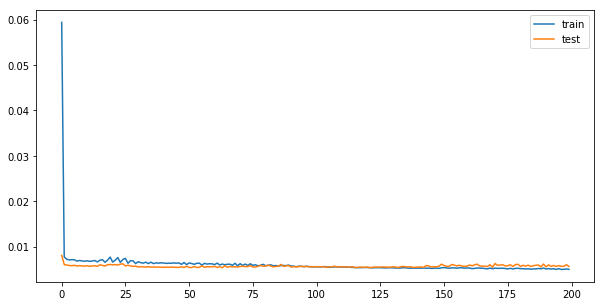

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


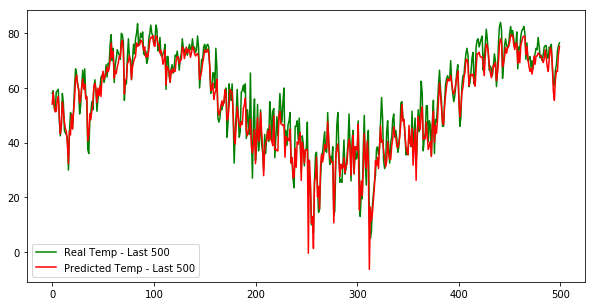

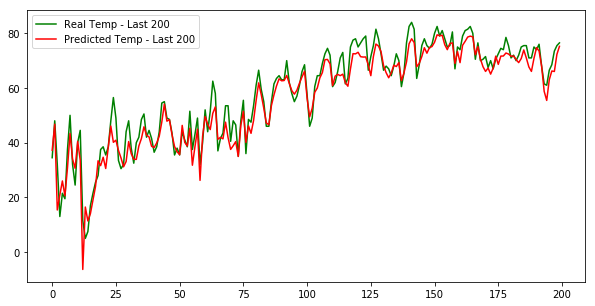

epoch_num: 200 neuron_num: 52
Test MSE: 54.367
Test RMSE: 7.373
Goodness of fit: 0.828
Mean Absolute Percentage Error: 15.262

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/400
 - 0s - loss: 0.0442 - val_loss: 0.0096
Epoch 2/400
 - 0s - loss: 0.0093 - val_loss: 0.0069
Epoch 3/400
 - 0s - loss: 0.0083 - val_loss: 0.0066
Epoch 4/400
 - 0s - loss: 0.0079 - val_loss: 0.0064
Epoch 5/400
 - 0s - loss: 0.0077 - val_loss: 0.0061
Epoch 6/400
 - 0s - loss: 0.0075 - val_loss: 0.0060
Epoch 7/400
 - 0s - loss: 0.0073 - val_loss: 0.0059
Epoch 8/400
 - 0s - loss: 0.0072 - val_loss: 0.0058
Epoch 9/400
 - 0s - loss: 0.0072 - val_loss: 0.0059
Epoch 10/400
 - 0s - loss: 0.0070 - val_loss: 0.0058
Epoch 11/400
 - 0s - loss: 0.0074 - val_loss: 0.0062
Epoch 12/400
 - 0s - loss: 0.0071 - val_loss: 0.0063
Epoch 13/400
 - 0s - loss: 0.0079 - val_loss: 0.0064
Epoch 14/400
 - 0s - loss: 0.0071 - val_loss: 0.0061
Epoch 15/40

Epoch 150/400
 - 0s - loss: 0.0056 - val_loss: 0.0063
Epoch 151/400
 - 0s - loss: 0.0063 - val_loss: 0.0054
Epoch 152/400
 - 0s - loss: 0.0055 - val_loss: 0.0056
Epoch 153/400
 - 0s - loss: 0.0058 - val_loss: 0.0055
Epoch 154/400
 - 0s - loss: 0.0055 - val_loss: 0.0057
Epoch 155/400
 - 0s - loss: 0.0059 - val_loss: 0.0056
Epoch 156/400
 - 0s - loss: 0.0055 - val_loss: 0.0058
Epoch 157/400
 - 0s - loss: 0.0060 - val_loss: 0.0055
Epoch 158/400
 - 0s - loss: 0.0056 - val_loss: 0.0062
Epoch 159/400
 - 0s - loss: 0.0061 - val_loss: 0.0055
Epoch 160/400
 - 0s - loss: 0.0056 - val_loss: 0.0063
Epoch 161/400
 - 0s - loss: 0.0062 - val_loss: 0.0055
Epoch 162/400
 - 0s - loss: 0.0056 - val_loss: 0.0063
Epoch 163/400
 - 0s - loss: 0.0062 - val_loss: 0.0056
Epoch 164/400
 - 0s - loss: 0.0055 - val_loss: 0.0059
Epoch 165/400
 - 0s - loss: 0.0059 - val_loss: 0.0056
Epoch 166/400
 - 0s - loss: 0.0055 - val_loss: 0.0061
Epoch 167/400
 - 0s - loss: 0.0060 - val_loss: 0.0055
Epoch 168/400
 - 0s - loss: 

Epoch 302/400
 - 0s - loss: 0.0051 - val_loss: 0.0056
Epoch 303/400
 - 0s - loss: 0.0052 - val_loss: 0.0061
Epoch 304/400
 - 0s - loss: 0.0053 - val_loss: 0.0063
Epoch 305/400
 - 0s - loss: 0.0051 - val_loss: 0.0059
Epoch 306/400
 - 0s - loss: 0.0052 - val_loss: 0.0062
Epoch 307/400
 - 0s - loss: 0.0053 - val_loss: 0.0062
Epoch 308/400
 - 0s - loss: 0.0051 - val_loss: 0.0057
Epoch 309/400
 - 0s - loss: 0.0052 - val_loss: 0.0061
Epoch 310/400
 - 0s - loss: 0.0053 - val_loss: 0.0064
Epoch 311/400
 - 0s - loss: 0.0052 - val_loss: 0.0059
Epoch 312/400
 - 0s - loss: 0.0051 - val_loss: 0.0059
Epoch 313/400
 - 0s - loss: 0.0052 - val_loss: 0.0065
Epoch 314/400
 - 0s - loss: 0.0053 - val_loss: 0.0060
Epoch 315/400
 - 0s - loss: 0.0050 - val_loss: 0.0057
Epoch 316/400
 - 0s - loss: 0.0053 - val_loss: 0.0065
Epoch 317/400
 - 0s - loss: 0.0055 - val_loss: 0.0063
Epoch 318/400
 - 0s - loss: 0.0051 - val_loss: 0.0055
Epoch 319/400
 - 0s - loss: 0.0053 - val_loss: 0.0064
Epoch 320/400
 - 0s - loss: 

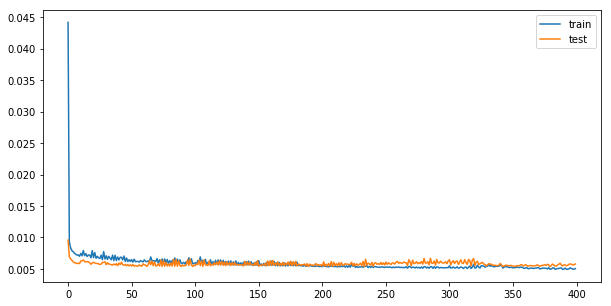

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


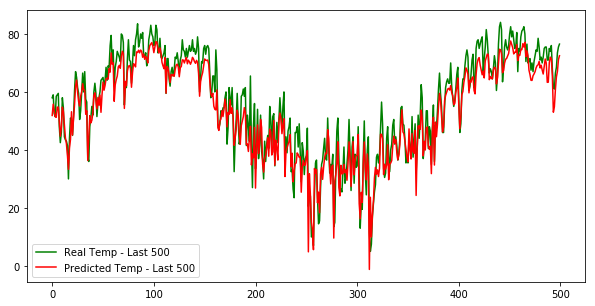

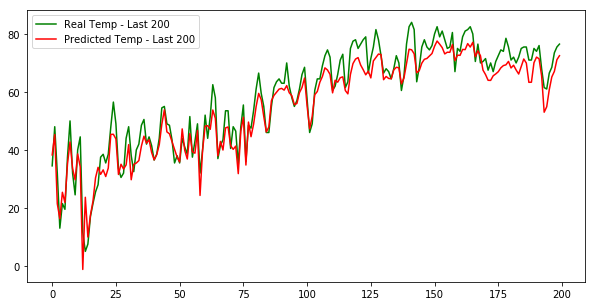

epoch_num: 400 neuron_num: 32
Test MSE: 55.301
Test RMSE: 7.436
Goodness of fit: 0.825
Mean Absolute Percentage Error: 15.350

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/400
 - 0s - loss: 0.0236 - val_loss: 0.0084
Epoch 2/400
 - 0s - loss: 0.0092 - val_loss: 0.0073
Epoch 3/400
 - 0s - loss: 0.0086 - val_loss: 0.0069
Epoch 4/400
 - 0s - loss: 0.0082 - val_loss: 0.0066
Epoch 5/400
 - 0s - loss: 0.0079 - val_loss: 0.0064
Epoch 6/400
 - 0s - loss: 0.0078 - val_loss: 0.0063
Epoch 7/400
 - 0s - loss: 0.0076 - val_loss: 0.0061
Epoch 8/400
 - 0s - loss: 0.0076 - val_loss: 0.0062
Epoch 9/400
 - 0s - loss: 0.0075 - val_loss: 0.0062
Epoch 10/400
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 11/400
 - 0s - loss: 0.0072 - val_loss: 0.0059
Epoch 12/400
 - 0s - loss: 0.0077 - val_loss: 0.0062
Epoch 13/400
 - 0s - loss: 0.0072 - val_loss: 0.0061
Epoch 14/400
 - 0s - loss: 0.0068 - val_loss: 0.0060
Epoch 15/40

Epoch 150/400
 - 0s - loss: 0.0052 - val_loss: 0.0056
Epoch 151/400
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 152/400
 - 0s - loss: 0.0051 - val_loss: 0.0055
Epoch 153/400
 - 0s - loss: 0.0052 - val_loss: 0.0055
Epoch 154/400
 - 0s - loss: 0.0051 - val_loss: 0.0057
Epoch 155/400
 - 0s - loss: 0.0051 - val_loss: 0.0055
Epoch 156/400
 - 0s - loss: 0.0051 - val_loss: 0.0060
Epoch 157/400
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 158/400
 - 0s - loss: 0.0051 - val_loss: 0.0059
Epoch 159/400
 - 0s - loss: 0.0052 - val_loss: 0.0056
Epoch 160/400
 - 0s - loss: 0.0051 - val_loss: 0.0054
Epoch 161/400
 - 0s - loss: 0.0051 - val_loss: 0.0060
Epoch 162/400
 - 0s - loss: 0.0052 - val_loss: 0.0055
Epoch 163/400
 - 0s - loss: 0.0050 - val_loss: 0.0057
Epoch 164/400
 - 0s - loss: 0.0051 - val_loss: 0.0056
Epoch 165/400
 - 0s - loss: 0.0050 - val_loss: 0.0057
Epoch 166/400
 - 0s - loss: 0.0052 - val_loss: 0.0057
Epoch 167/400
 - 0s - loss: 0.0050 - val_loss: 0.0055
Epoch 168/400
 - 0s - loss: 

Epoch 302/400
 - 0s - loss: 0.0044 - val_loss: 0.0058
Epoch 303/400
 - 0s - loss: 0.0044 - val_loss: 0.0056
Epoch 304/400
 - 0s - loss: 0.0044 - val_loss: 0.0058
Epoch 305/400
 - 0s - loss: 0.0044 - val_loss: 0.0056
Epoch 306/400
 - 0s - loss: 0.0044 - val_loss: 0.0057
Epoch 307/400
 - 0s - loss: 0.0044 - val_loss: 0.0056
Epoch 308/400
 - 0s - loss: 0.0044 - val_loss: 0.0060
Epoch 309/400
 - 0s - loss: 0.0044 - val_loss: 0.0055
Epoch 310/400
 - 0s - loss: 0.0043 - val_loss: 0.0058
Epoch 311/400
 - 0s - loss: 0.0044 - val_loss: 0.0054
Epoch 312/400
 - 0s - loss: 0.0044 - val_loss: 0.0060
Epoch 313/400
 - 0s - loss: 0.0044 - val_loss: 0.0055
Epoch 314/400
 - 0s - loss: 0.0045 - val_loss: 0.0062
Epoch 315/400
 - 0s - loss: 0.0045 - val_loss: 0.0055
Epoch 316/400
 - 0s - loss: 0.0044 - val_loss: 0.0058
Epoch 317/400
 - 0s - loss: 0.0043 - val_loss: 0.0058
Epoch 318/400
 - 0s - loss: 0.0043 - val_loss: 0.0060
Epoch 319/400
 - 0s - loss: 0.0043 - val_loss: 0.0059
Epoch 320/400
 - 0s - loss: 

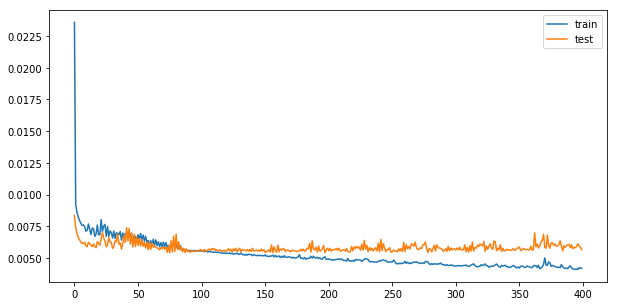

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


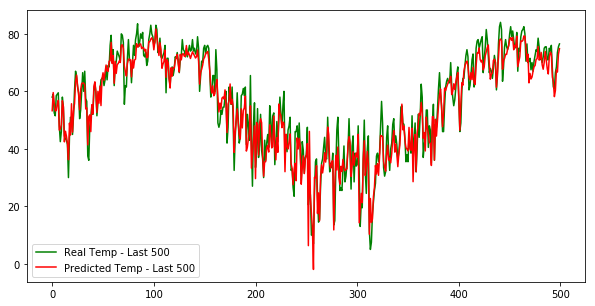

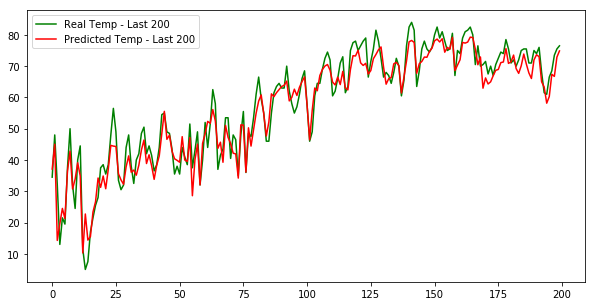

epoch_num: 400 neuron_num: 42
Test MSE: 54.173
Test RMSE: 7.360
Goodness of fit: 0.828
Mean Absolute Percentage Error: 15.408

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/400
 - 0s - loss: 0.0461 - val_loss: 0.0096
Epoch 2/400
 - 0s - loss: 0.0093 - val_loss: 0.0069
Epoch 3/400
 - 0s - loss: 0.0077 - val_loss: 0.0062
Epoch 4/400
 - 0s - loss: 0.0074 - val_loss: 0.0060
Epoch 5/400
 - 0s - loss: 0.0072 - val_loss: 0.0059
Epoch 6/400
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 7/400
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 8/400
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 9/400
 - 0s - loss: 0.0071 - val_loss: 0.0060
Epoch 10/400
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 11/400
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 12/400
 - 0s - loss: 0.0071 - val_loss: 0.0060
Epoch 13/400
 - 0s - loss: 0.0071 - val_loss: 0.0060
Epoch 14/400
 - 0s - loss: 0.0071 - val_loss: 0.0060
Epoch 15/40

Epoch 150/400
 - 0s - loss: 0.0057 - val_loss: 0.0053
Epoch 151/400
 - 0s - loss: 0.0055 - val_loss: 0.0070
Epoch 152/400
 - 0s - loss: 0.0060 - val_loss: 0.0052
Epoch 153/400
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 154/400
 - 0s - loss: 0.0057 - val_loss: 0.0053
Epoch 155/400
 - 0s - loss: 0.0054 - val_loss: 0.0064
Epoch 156/400
 - 0s - loss: 0.0056 - val_loss: 0.0054
Epoch 157/400
 - 0s - loss: 0.0055 - val_loss: 0.0058
Epoch 158/400
 - 0s - loss: 0.0054 - val_loss: 0.0052
Epoch 159/400
 - 0s - loss: 0.0055 - val_loss: 0.0059
Epoch 160/400
 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 161/400
 - 0s - loss: 0.0055 - val_loss: 0.0058
Epoch 162/400
 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 163/400
 - 0s - loss: 0.0055 - val_loss: 0.0056
Epoch 164/400
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 165/400
 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 166/400
 - 0s - loss: 0.0054 - val_loss: 0.0058
Epoch 167/400
 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 168/400
 - 0s - loss: 

Epoch 302/400
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 303/400
 - 0s - loss: 0.0048 - val_loss: 0.0060
Epoch 304/400
 - 0s - loss: 0.0047 - val_loss: 0.0058
Epoch 305/400
 - 0s - loss: 0.0048 - val_loss: 0.0065
Epoch 306/400
 - 0s - loss: 0.0049 - val_loss: 0.0062
Epoch 307/400
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 308/400
 - 0s - loss: 0.0049 - val_loss: 0.0078
Epoch 309/400
 - 0s - loss: 0.0051 - val_loss: 0.0056
Epoch 310/400
 - 0s - loss: 0.0051 - val_loss: 0.0069
Epoch 311/400
 - 0s - loss: 0.0049 - val_loss: 0.0053
Epoch 312/400
 - 0s - loss: 0.0052 - val_loss: 0.0083
Epoch 313/400
 - 0s - loss: 0.0057 - val_loss: 0.0063
Epoch 314/400
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 315/400
 - 0s - loss: 0.0052 - val_loss: 0.0085
Epoch 316/400
 - 0s - loss: 0.0055 - val_loss: 0.0068
Epoch 317/400
 - 0s - loss: 0.0049 - val_loss: 0.0057
Epoch 318/400
 - 0s - loss: 0.0048 - val_loss: 0.0065
Epoch 319/400
 - 0s - loss: 0.0050 - val_loss: 0.0061
Epoch 320/400
 - 0s - loss: 

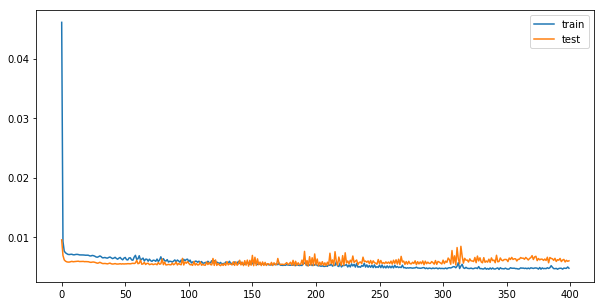

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


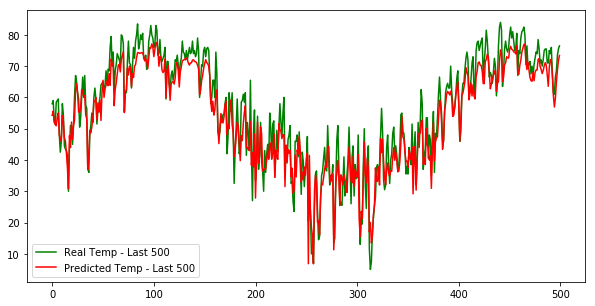

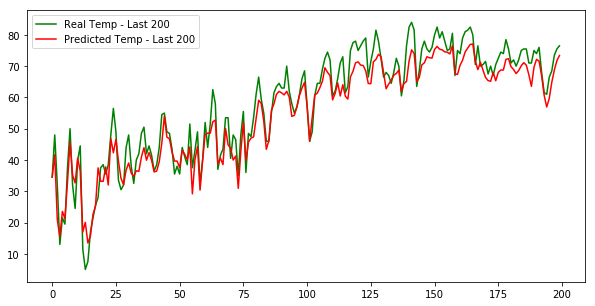

epoch_num: 400 neuron_num: 52
Test MSE: 58.115
Test RMSE: 7.623
Goodness of fit: 0.816
Mean Absolute Percentage Error: 16.577

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/600
 - 0s - loss: 0.1429 - val_loss: 0.0161
Epoch 2/600
 - 0s - loss: 0.0173 - val_loss: 0.0102
Epoch 3/600
 - 0s - loss: 0.0104 - val_loss: 0.0071
Epoch 4/600
 - 0s - loss: 0.0080 - val_loss: 0.0062
Epoch 5/600
 - 0s - loss: 0.0076 - val_loss: 0.0061
Epoch 6/600
 - 0s - loss: 0.0074 - val_loss: 0.0060
Epoch 7/600
 - 0s - loss: 0.0072 - val_loss: 0.0059
Epoch 8/600
 - 0s - loss: 0.0072 - val_loss: 0.0058
Epoch 9/600
 - 0s - loss: 0.0070 - val_loss: 0.0057
Epoch 10/600
 - 0s - loss: 0.0070 - val_loss: 0.0057
Epoch 11/600
 - 0s - loss: 0.0069 - val_loss: 0.0057
Epoch 12/600
 - 0s - loss: 0.0069 - val_loss: 0.0057
Epoch 13/600
 - 0s - loss: 0.0069 - val_loss: 0.0057
Epoch 14/600
 - 0s - loss: 0.0069 - val_loss: 0.0057
Epoch 15/60

Epoch 150/600
 - 0s - loss: 0.0054 - val_loss: 0.0051
Epoch 151/600
 - 0s - loss: 0.0055 - val_loss: 0.0052
Epoch 152/600
 - 0s - loss: 0.0053 - val_loss: 0.0052
Epoch 153/600
 - 0s - loss: 0.0055 - val_loss: 0.0051
Epoch 154/600
 - 0s - loss: 0.0054 - val_loss: 0.0052
Epoch 155/600
 - 0s - loss: 0.0054 - val_loss: 0.0051
Epoch 156/600
 - 0s - loss: 0.0054 - val_loss: 0.0052
Epoch 157/600
 - 0s - loss: 0.0053 - val_loss: 0.0051
Epoch 158/600
 - 0s - loss: 0.0054 - val_loss: 0.0052
Epoch 159/600
 - 0s - loss: 0.0053 - val_loss: 0.0051
Epoch 160/600
 - 0s - loss: 0.0053 - val_loss: 0.0052
Epoch 161/600
 - 0s - loss: 0.0053 - val_loss: 0.0052
Epoch 162/600
 - 0s - loss: 0.0053 - val_loss: 0.0052
Epoch 163/600
 - 0s - loss: 0.0053 - val_loss: 0.0052
Epoch 164/600
 - 0s - loss: 0.0053 - val_loss: 0.0051
Epoch 165/600
 - 0s - loss: 0.0053 - val_loss: 0.0051
Epoch 166/600
 - 0s - loss: 0.0053 - val_loss: 0.0051
Epoch 167/600
 - 0s - loss: 0.0053 - val_loss: 0.0052
Epoch 168/600
 - 0s - loss: 

Epoch 302/600
 - 0s - loss: 0.0050 - val_loss: 0.0056
Epoch 303/600
 - 0s - loss: 0.0050 - val_loss: 0.0055
Epoch 304/600
 - 0s - loss: 0.0050 - val_loss: 0.0057
Epoch 305/600
 - 0s - loss: 0.0051 - val_loss: 0.0059
Epoch 306/600
 - 0s - loss: 0.0051 - val_loss: 0.0057
Epoch 307/600
 - 0s - loss: 0.0051 - val_loss: 0.0061
Epoch 308/600
 - 0s - loss: 0.0053 - val_loss: 0.0063
Epoch 309/600
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 310/600
 - 0s - loss: 0.0054 - val_loss: 0.0058
Epoch 311/600
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 312/600
 - 0s - loss: 0.0052 - val_loss: 0.0059
Epoch 313/600
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 314/600
 - 0s - loss: 0.0052 - val_loss: 0.0058
Epoch 315/600
 - 0s - loss: 0.0052 - val_loss: 0.0058
Epoch 316/600
 - 0s - loss: 0.0051 - val_loss: 0.0055
Epoch 317/600
 - 0s - loss: 0.0053 - val_loss: 0.0059
Epoch 318/600
 - 0s - loss: 0.0051 - val_loss: 0.0054
Epoch 319/600
 - 0s - loss: 0.0051 - val_loss: 0.0059
Epoch 320/600
 - 0s - loss: 

Epoch 454/600
 - 0s - loss: 0.0048 - val_loss: 0.0056
Epoch 455/600
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 456/600
 - 0s - loss: 0.0048 - val_loss: 0.0054
Epoch 457/600
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 458/600
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 459/600
 - 0s - loss: 0.0047 - val_loss: 0.0058
Epoch 460/600
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 461/600
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 462/600
 - 0s - loss: 0.0049 - val_loss: 0.0058
Epoch 463/600
 - 0s - loss: 0.0048 - val_loss: 0.0052
Epoch 464/600
 - 0s - loss: 0.0048 - val_loss: 0.0059
Epoch 465/600
 - 0s - loss: 0.0049 - val_loss: 0.0056
Epoch 466/600
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 467/600
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 468/600
 - 0s - loss: 0.0048 - val_loss: 0.0054
Epoch 469/600
 - 0s - loss: 0.0048 - val_loss: 0.0058
Epoch 470/600
 - 0s - loss: 0.0049 - val_loss: 0.0054
Epoch 471/600
 - 0s - loss: 0.0048 - val_loss: 0.0058
Epoch 472/600
 - 0s - loss: 

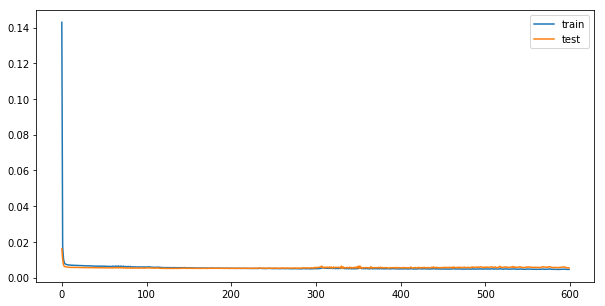

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


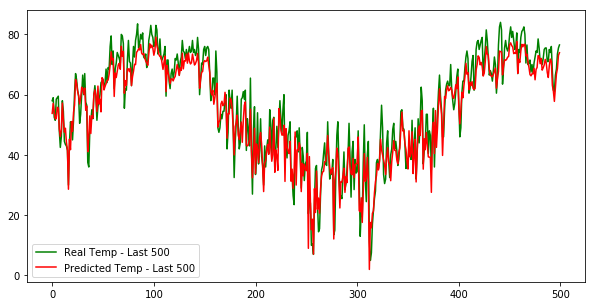

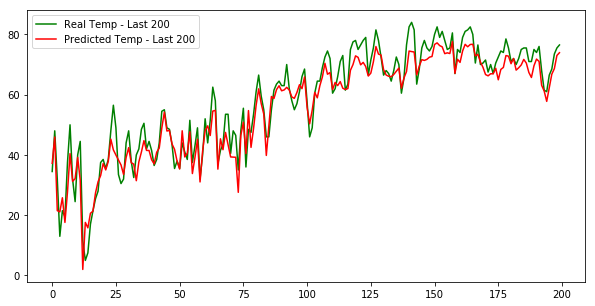

epoch_num: 600 neuron_num: 32
Test MSE: 51.461
Test RMSE: 7.174
Goodness of fit: 0.837
Mean Absolute Percentage Error: 15.114

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/600
 - 0s - loss: 0.0356 - val_loss: 0.0085
Epoch 2/600
 - 0s - loss: 0.0087 - val_loss: 0.0066
Epoch 3/600
 - 0s - loss: 0.0083 - val_loss: 0.0064
Epoch 4/600
 - 0s - loss: 0.0078 - val_loss: 0.0061
Epoch 5/600
 - 0s - loss: 0.0080 - val_loss: 0.0060
Epoch 6/600
 - 0s - loss: 0.0078 - val_loss: 0.0060
Epoch 7/600
 - 0s - loss: 0.0078 - val_loss: 0.0060
Epoch 8/600
 - 0s - loss: 0.0078 - val_loss: 0.0059
Epoch 9/600
 - 0s - loss: 0.0078 - val_loss: 0.0059
Epoch 10/600
 - 0s - loss: 0.0077 - val_loss: 0.0059
Epoch 11/600
 - 0s - loss: 0.0078 - val_loss: 0.0059
Epoch 12/600
 - 0s - loss: 0.0076 - val_loss: 0.0058
Epoch 13/600
 - 0s - loss: 0.0076 - val_loss: 0.0058
Epoch 14/600
 - 0s - loss: 0.0076 - val_loss: 0.0058
Epoch 15/60

Epoch 150/600
 - 0s - loss: 0.0056 - val_loss: 0.0057
Epoch 151/600
 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 152/600
 - 0s - loss: 0.0056 - val_loss: 0.0060
Epoch 153/600
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 154/600
 - 0s - loss: 0.0057 - val_loss: 0.0056
Epoch 155/600
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 156/600
 - 0s - loss: 0.0055 - val_loss: 0.0059
Epoch 157/600
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 158/600
 - 0s - loss: 0.0056 - val_loss: 0.0058
Epoch 159/600
 - 0s - loss: 0.0054 - val_loss: 0.0057
Epoch 160/600
 - 0s - loss: 0.0055 - val_loss: 0.0056
Epoch 161/600
 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 162/600
 - 0s - loss: 0.0055 - val_loss: 0.0058
Epoch 163/600
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 164/600
 - 0s - loss: 0.0054 - val_loss: 0.0057
Epoch 165/600
 - 0s - loss: 0.0055 - val_loss: 0.0058
Epoch 166/600
 - 0s - loss: 0.0054 - val_loss: 0.0057
Epoch 167/600
 - 0s - loss: 0.0055 - val_loss: 0.0057
Epoch 168/600
 - 0s - loss: 

Epoch 302/600
 - 0s - loss: 0.0049 - val_loss: 0.0058
Epoch 303/600
 - 0s - loss: 0.0048 - val_loss: 0.0061
Epoch 304/600
 - 0s - loss: 0.0049 - val_loss: 0.0060
Epoch 305/600
 - 0s - loss: 0.0049 - val_loss: 0.0062
Epoch 306/600
 - 0s - loss: 0.0048 - val_loss: 0.0060
Epoch 307/600
 - 0s - loss: 0.0047 - val_loss: 0.0059
Epoch 308/600
 - 0s - loss: 0.0048 - val_loss: 0.0060
Epoch 309/600
 - 0s - loss: 0.0048 - val_loss: 0.0060
Epoch 310/600
 - 0s - loss: 0.0049 - val_loss: 0.0060
Epoch 311/600
 - 0s - loss: 0.0049 - val_loss: 0.0065
Epoch 312/600
 - 0s - loss: 0.0049 - val_loss: 0.0057
Epoch 313/600
 - 0s - loss: 0.0048 - val_loss: 0.0059
Epoch 314/600
 - 0s - loss: 0.0048 - val_loss: 0.0064
Epoch 315/600
 - 0s - loss: 0.0048 - val_loss: 0.0060
Epoch 316/600
 - 0s - loss: 0.0048 - val_loss: 0.0059
Epoch 317/600
 - 0s - loss: 0.0048 - val_loss: 0.0060
Epoch 318/600
 - 0s - loss: 0.0048 - val_loss: 0.0059
Epoch 319/600
 - 0s - loss: 0.0047 - val_loss: 0.0062
Epoch 320/600
 - 0s - loss: 

Epoch 454/600
 - 0s - loss: 0.0044 - val_loss: 0.0058
Epoch 455/600
 - 0s - loss: 0.0044 - val_loss: 0.0059
Epoch 456/600
 - 0s - loss: 0.0045 - val_loss: 0.0060
Epoch 457/600
 - 0s - loss: 0.0045 - val_loss: 0.0059
Epoch 458/600
 - 0s - loss: 0.0045 - val_loss: 0.0063
Epoch 459/600
 - 0s - loss: 0.0049 - val_loss: 0.0057
Epoch 460/600
 - 0s - loss: 0.0045 - val_loss: 0.0064
Epoch 461/600
 - 0s - loss: 0.0049 - val_loss: 0.0056
Epoch 462/600
 - 0s - loss: 0.0046 - val_loss: 0.0063
Epoch 463/600
 - 0s - loss: 0.0048 - val_loss: 0.0058
Epoch 464/600
 - 0s - loss: 0.0044 - val_loss: 0.0060
Epoch 465/600
 - 0s - loss: 0.0049 - val_loss: 0.0057
Epoch 466/600
 - 0s - loss: 0.0045 - val_loss: 0.0065
Epoch 467/600
 - 0s - loss: 0.0050 - val_loss: 0.0057
Epoch 468/600
 - 0s - loss: 0.0046 - val_loss: 0.0067
Epoch 469/600
 - 0s - loss: 0.0052 - val_loss: 0.0060
Epoch 470/600
 - 0s - loss: 0.0044 - val_loss: 0.0059
Epoch 471/600
 - 0s - loss: 0.0050 - val_loss: 0.0066
Epoch 472/600
 - 0s - loss: 

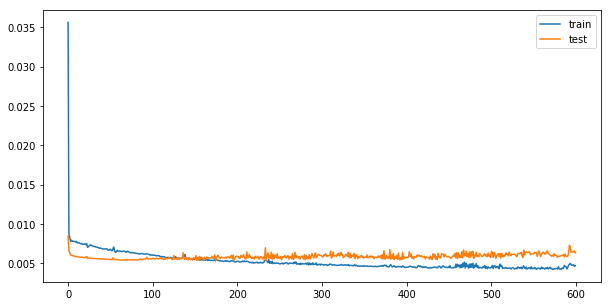

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


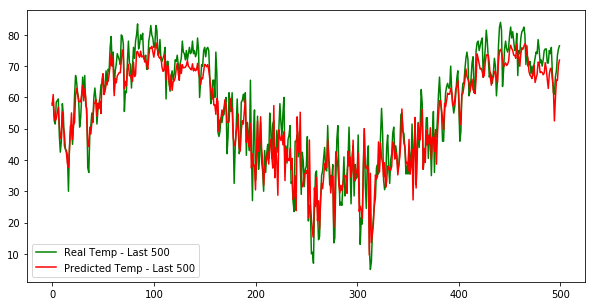

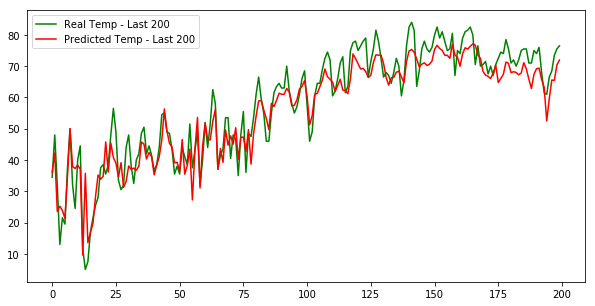

epoch_num: 600 neuron_num: 42
Test MSE: 60.879
Test RMSE: 7.803
Goodness of fit: 0.807
Mean Absolute Percentage Error: 16.690

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/600
 - 0s - loss: 0.1070 - val_loss: 0.0104
Epoch 2/600
 - 0s - loss: 0.0091 - val_loss: 0.0068
Epoch 3/600
 - 0s - loss: 0.0074 - val_loss: 0.0063
Epoch 4/600
 - 0s - loss: 0.0073 - val_loss: 0.0061
Epoch 5/600
 - 0s - loss: 0.0072 - val_loss: 0.0060
Epoch 6/600
 - 0s - loss: 0.0072 - val_loss: 0.0060
Epoch 7/600
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 8/600
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 9/600
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 10/600
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 11/600
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 12/600
 - 0s - loss: 0.0070 - val_loss: 0.0058
Epoch 13/600
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 14/600
 - 0s - loss: 0.0070 - val_loss: 0.0058
Epoch 15/60

Epoch 150/600
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 151/600
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 152/600
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 153/600
 - 0s - loss: 0.0052 - val_loss: 0.0053
Epoch 154/600
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 155/600
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 156/600
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 157/600
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 158/600
 - 0s - loss: 0.0051 - val_loss: 0.0055
Epoch 159/600
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 160/600
 - 0s - loss: 0.0052 - val_loss: 0.0056
Epoch 161/600
 - 0s - loss: 0.0052 - val_loss: 0.0055
Epoch 162/600
 - 0s - loss: 0.0052 - val_loss: 0.0055
Epoch 163/600
 - 0s - loss: 0.0051 - val_loss: 0.0056
Epoch 164/600
 - 0s - loss: 0.0052 - val_loss: 0.0056
Epoch 165/600
 - 0s - loss: 0.0052 - val_loss: 0.0055
Epoch 166/600
 - 0s - loss: 0.0052 - val_loss: 0.0056
Epoch 167/600
 - 0s - loss: 0.0052 - val_loss: 0.0055
Epoch 168/600
 - 0s - loss: 

Epoch 302/600
 - 0s - loss: 0.0047 - val_loss: 0.0059
Epoch 303/600
 - 0s - loss: 0.0047 - val_loss: 0.0059
Epoch 304/600
 - 0s - loss: 0.0048 - val_loss: 0.0064
Epoch 305/600
 - 0s - loss: 0.0048 - val_loss: 0.0060
Epoch 306/600
 - 0s - loss: 0.0047 - val_loss: 0.0059
Epoch 307/600
 - 0s - loss: 0.0047 - val_loss: 0.0060
Epoch 308/600
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 309/600
 - 0s - loss: 0.0046 - val_loss: 0.0062
Epoch 310/600
 - 0s - loss: 0.0046 - val_loss: 0.0059
Epoch 311/600
 - 0s - loss: 0.0046 - val_loss: 0.0059
Epoch 312/600
 - 0s - loss: 0.0047 - val_loss: 0.0062
Epoch 313/600
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 314/600
 - 0s - loss: 0.0046 - val_loss: 0.0058
Epoch 315/600
 - 0s - loss: 0.0047 - val_loss: 0.0066
Epoch 316/600
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 317/600
 - 0s - loss: 0.0046 - val_loss: 0.0060
Epoch 318/600
 - 0s - loss: 0.0045 - val_loss: 0.0063
Epoch 319/600
 - 0s - loss: 0.0046 - val_loss: 0.0056
Epoch 320/600
 - 0s - loss: 

Epoch 454/600
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 455/600
 - 0s - loss: 0.0043 - val_loss: 0.0056
Epoch 456/600
 - 0s - loss: 0.0050 - val_loss: 0.0072
Epoch 457/600
 - 0s - loss: 0.0053 - val_loss: 0.0064
Epoch 458/600
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 459/600
 - 0s - loss: 0.0047 - val_loss: 0.0058
Epoch 460/600
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 461/600
 - 0s - loss: 0.0052 - val_loss: 0.0058
Epoch 462/600
 - 0s - loss: 0.0045 - val_loss: 0.0056
Epoch 463/600
 - 0s - loss: 0.0045 - val_loss: 0.0057
Epoch 464/600
 - 0s - loss: 0.0045 - val_loss: 0.0058
Epoch 465/600
 - 0s - loss: 0.0044 - val_loss: 0.0057
Epoch 466/600
 - 0s - loss: 0.0044 - val_loss: 0.0058
Epoch 467/600
 - 0s - loss: 0.0046 - val_loss: 0.0060
Epoch 468/600
 - 0s - loss: 0.0045 - val_loss: 0.0061
Epoch 469/600
 - 0s - loss: 0.0044 - val_loss: 0.0058
Epoch 470/600
 - 0s - loss: 0.0043 - val_loss: 0.0057
Epoch 471/600
 - 0s - loss: 0.0043 - val_loss: 0.0059
Epoch 472/600
 - 0s - loss: 

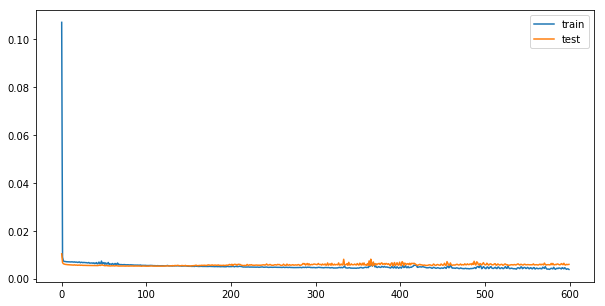

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


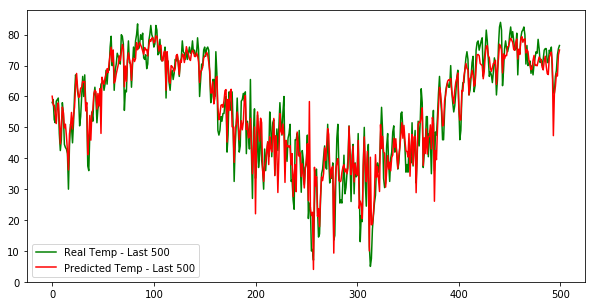

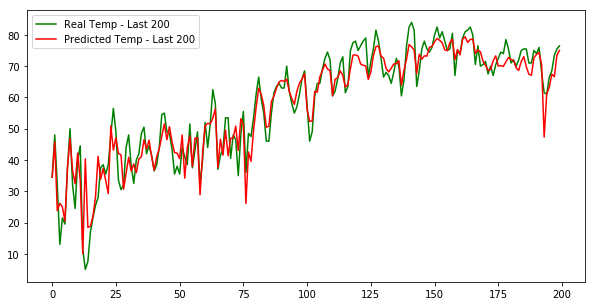

epoch_num: 600 neuron_num: 52
Test MSE: 57.687
Test RMSE: 7.595
Goodness of fit: 0.817
Mean Absolute Percentage Error: 16.199

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/800
 - 0s - loss: 0.0382 - val_loss: 0.0106
Epoch 2/800
 - 0s - loss: 0.0112 - val_loss: 0.0082
Epoch 3/800
 - 0s - loss: 0.0093 - val_loss: 0.0075
Epoch 4/800
 - 0s - loss: 0.0084 - val_loss: 0.0068
Epoch 5/800
 - 0s - loss: 0.0080 - val_loss: 0.0065
Epoch 6/800
 - 0s - loss: 0.0076 - val_loss: 0.0062
Epoch 7/800
 - 0s - loss: 0.0075 - val_loss: 0.0061
Epoch 8/800
 - 0s - loss: 0.0075 - val_loss: 0.0065
Epoch 9/800
 - 0s - loss: 0.0073 - val_loss: 0.0060
Epoch 10/800
 - 0s - loss: 0.0080 - val_loss: 0.0071
Epoch 11/800
 - 0s - loss: 0.0077 - val_loss: 0.0066
Epoch 12/800
 - 0s - loss: 0.0075 - val_loss: 0.0064
Epoch 13/800
 - 0s - loss: 0.0087 - val_loss: 0.0077
Epoch 14/800
 - 0s - loss: 0.0073 - val_loss: 0.0060
Epoch 15/80

Epoch 150/800
 - 0s - loss: 0.0058 - val_loss: 0.0055
Epoch 151/800
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 152/800
 - 0s - loss: 0.0059 - val_loss: 0.0056
Epoch 153/800
 - 0s - loss: 0.0056 - val_loss: 0.0059
Epoch 154/800
 - 0s - loss: 0.0060 - val_loss: 0.0056
Epoch 155/800
 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 156/800
 - 0s - loss: 0.0057 - val_loss: 0.0058
Epoch 157/800
 - 0s - loss: 0.0054 - val_loss: 0.0052
Epoch 158/800
 - 0s - loss: 0.0057 - val_loss: 0.0059
Epoch 159/800
 - 0s - loss: 0.0055 - val_loss: 0.0052
Epoch 160/800
 - 0s - loss: 0.0057 - val_loss: 0.0061
Epoch 161/800
 - 0s - loss: 0.0055 - val_loss: 0.0052
Epoch 162/800
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 163/800
 - 0s - loss: 0.0055 - val_loss: 0.0052
Epoch 164/800
 - 0s - loss: 0.0057 - val_loss: 0.0060
Epoch 165/800
 - 0s - loss: 0.0055 - val_loss: 0.0053
Epoch 166/800
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 167/800
 - 0s - loss: 0.0055 - val_loss: 0.0053
Epoch 168/800
 - 0s - loss: 

Epoch 302/800
 - 0s - loss: 0.0047 - val_loss: 0.0058
Epoch 303/800
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 304/800
 - 0s - loss: 0.0047 - val_loss: 0.0059
Epoch 305/800
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 306/800
 - 0s - loss: 0.0047 - val_loss: 0.0059
Epoch 307/800
 - 0s - loss: 0.0047 - val_loss: 0.0061
Epoch 308/800
 - 0s - loss: 0.0048 - val_loss: 0.0058
Epoch 309/800
 - 0s - loss: 0.0046 - val_loss: 0.0058
Epoch 310/800
 - 0s - loss: 0.0046 - val_loss: 0.0058
Epoch 311/800
 - 0s - loss: 0.0046 - val_loss: 0.0058
Epoch 312/800
 - 0s - loss: 0.0047 - val_loss: 0.0060
Epoch 313/800
 - 0s - loss: 0.0047 - val_loss: 0.0060
Epoch 314/800
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 315/800
 - 0s - loss: 0.0046 - val_loss: 0.0060
Epoch 316/800
 - 0s - loss: 0.0046 - val_loss: 0.0058
Epoch 317/800
 - 0s - loss: 0.0046 - val_loss: 0.0058
Epoch 318/800
 - 0s - loss: 0.0046 - val_loss: 0.0056
Epoch 319/800
 - 0s - loss: 0.0046 - val_loss: 0.0059
Epoch 320/800
 - 0s - loss: 

Epoch 454/800
 - 0s - loss: 0.0041 - val_loss: 0.0059
Epoch 455/800
 - 0s - loss: 0.0041 - val_loss: 0.0060
Epoch 456/800
 - 0s - loss: 0.0041 - val_loss: 0.0060
Epoch 457/800
 - 0s - loss: 0.0041 - val_loss: 0.0060
Epoch 458/800
 - 0s - loss: 0.0041 - val_loss: 0.0060
Epoch 459/800
 - 0s - loss: 0.0041 - val_loss: 0.0060
Epoch 460/800
 - 0s - loss: 0.0041 - val_loss: 0.0060
Epoch 461/800
 - 0s - loss: 0.0041 - val_loss: 0.0061
Epoch 462/800
 - 0s - loss: 0.0042 - val_loss: 0.0062
Epoch 463/800
 - 0s - loss: 0.0042 - val_loss: 0.0060
Epoch 464/800
 - 0s - loss: 0.0042 - val_loss: 0.0062
Epoch 465/800
 - 0s - loss: 0.0041 - val_loss: 0.0062
Epoch 466/800
 - 0s - loss: 0.0041 - val_loss: 0.0059
Epoch 467/800
 - 0s - loss: 0.0041 - val_loss: 0.0062
Epoch 468/800
 - 0s - loss: 0.0041 - val_loss: 0.0063
Epoch 469/800
 - 0s - loss: 0.0041 - val_loss: 0.0060
Epoch 470/800
 - 0s - loss: 0.0041 - val_loss: 0.0061
Epoch 471/800
 - 0s - loss: 0.0041 - val_loss: 0.0060
Epoch 472/800
 - 0s - loss: 

Epoch 606/800
 - 0s - loss: 0.0037 - val_loss: 0.0062
Epoch 607/800
 - 0s - loss: 0.0037 - val_loss: 0.0062
Epoch 608/800
 - 0s - loss: 0.0037 - val_loss: 0.0062
Epoch 609/800
 - 0s - loss: 0.0038 - val_loss: 0.0062
Epoch 610/800
 - 0s - loss: 0.0038 - val_loss: 0.0061
Epoch 611/800
 - 0s - loss: 0.0039 - val_loss: 0.0064
Epoch 612/800
 - 0s - loss: 0.0038 - val_loss: 0.0061
Epoch 613/800
 - 0s - loss: 0.0037 - val_loss: 0.0061
Epoch 614/800
 - 0s - loss: 0.0038 - val_loss: 0.0063
Epoch 615/800
 - 0s - loss: 0.0037 - val_loss: 0.0063
Epoch 616/800
 - 0s - loss: 0.0039 - val_loss: 0.0063
Epoch 617/800
 - 0s - loss: 0.0038 - val_loss: 0.0061
Epoch 618/800
 - 0s - loss: 0.0037 - val_loss: 0.0061
Epoch 619/800
 - 0s - loss: 0.0036 - val_loss: 0.0061
Epoch 620/800
 - 0s - loss: 0.0037 - val_loss: 0.0062
Epoch 621/800
 - 0s - loss: 0.0036 - val_loss: 0.0062
Epoch 622/800
 - 0s - loss: 0.0039 - val_loss: 0.0066
Epoch 623/800
 - 0s - loss: 0.0037 - val_loss: 0.0062
Epoch 624/800
 - 0s - loss: 

Epoch 758/800
 - 0s - loss: 0.0034 - val_loss: 0.0064
Epoch 759/800
 - 0s - loss: 0.0035 - val_loss: 0.0063
Epoch 760/800
 - 0s - loss: 0.0036 - val_loss: 0.0066
Epoch 761/800
 - 0s - loss: 0.0033 - val_loss: 0.0064
Epoch 762/800
 - 0s - loss: 0.0035 - val_loss: 0.0061
Epoch 763/800
 - 0s - loss: 0.0035 - val_loss: 0.0063
Epoch 764/800
 - 0s - loss: 0.0034 - val_loss: 0.0063
Epoch 765/800
 - 0s - loss: 0.0034 - val_loss: 0.0064
Epoch 766/800
 - 0s - loss: 0.0036 - val_loss: 0.0065
Epoch 767/800
 - 0s - loss: 0.0036 - val_loss: 0.0063
Epoch 768/800
 - 0s - loss: 0.0036 - val_loss: 0.0063
Epoch 769/800
 - 0s - loss: 0.0036 - val_loss: 0.0062
Epoch 770/800
 - 0s - loss: 0.0043 - val_loss: 0.0068
Epoch 771/800
 - 0s - loss: 0.0041 - val_loss: 0.0063
Epoch 772/800
 - 0s - loss: 0.0035 - val_loss: 0.0064
Epoch 773/800
 - 0s - loss: 0.0038 - val_loss: 0.0070
Epoch 774/800
 - 0s - loss: 0.0037 - val_loss: 0.0071
Epoch 775/800
 - 0s - loss: 0.0040 - val_loss: 0.0095
Epoch 776/800
 - 0s - loss: 

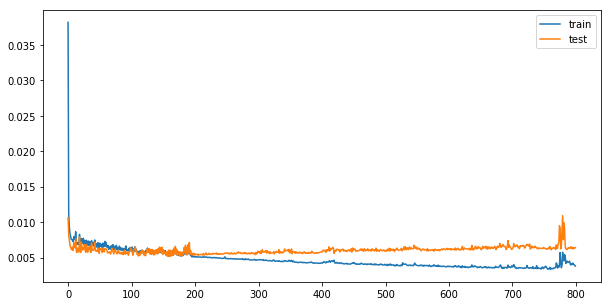

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


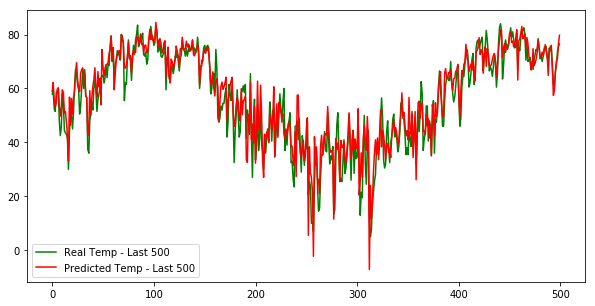

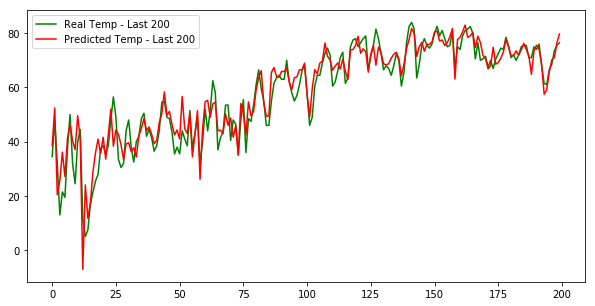

epoch_num: 800 neuron_num: 32
Test MSE: 61.682
Test RMSE: 7.854
Goodness of fit: 0.804
Mean Absolute Percentage Error: 17.405

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/800
 - 1s - loss: 0.0917 - val_loss: 0.0121
Epoch 2/800
 - 0s - loss: 0.0099 - val_loss: 0.0068
Epoch 3/800
 - 0s - loss: 0.0082 - val_loss: 0.0064
Epoch 4/800
 - 0s - loss: 0.0080 - val_loss: 0.0063
Epoch 5/800
 - 0s - loss: 0.0077 - val_loss: 0.0061
Epoch 6/800
 - 0s - loss: 0.0076 - val_loss: 0.0060
Epoch 7/800
 - 0s - loss: 0.0075 - val_loss: 0.0059
Epoch 8/800
 - 0s - loss: 0.0074 - val_loss: 0.0059
Epoch 9/800
 - 0s - loss: 0.0074 - val_loss: 0.0059
Epoch 10/800
 - 0s - loss: 0.0073 - val_loss: 0.0059
Epoch 11/800
 - 0s - loss: 0.0073 - val_loss: 0.0058
Epoch 12/800
 - 0s - loss: 0.0072 - val_loss: 0.0058
Epoch 13/800
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 14/800
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 15/80

Epoch 150/800
 - 0s - loss: 0.0056 - val_loss: 0.0054
Epoch 151/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 152/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 153/800
 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 154/800
 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 155/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 156/800
 - 0s - loss: 0.0055 - val_loss: 0.0053
Epoch 157/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 158/800
 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 159/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 160/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 161/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 162/800
 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 163/800
 - 0s - loss: 0.0055 - val_loss: 0.0053
Epoch 164/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 165/800
 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 166/800
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 167/800
 - 0s - loss: 0.0055 - val_loss: 0.0054
Epoch 168/800
 - 0s - loss: 

Epoch 302/800
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 303/800
 - 0s - loss: 0.0048 - val_loss: 0.0054
Epoch 304/800
 - 0s - loss: 0.0048 - val_loss: 0.0056
Epoch 305/800
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 306/800
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 307/800
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 308/800
 - 0s - loss: 0.0048 - val_loss: 0.0054
Epoch 309/800
 - 0s - loss: 0.0048 - val_loss: 0.0054
Epoch 310/800
 - 0s - loss: 0.0047 - val_loss: 0.0055
Epoch 311/800
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 312/800
 - 0s - loss: 0.0048 - val_loss: 0.0056
Epoch 313/800
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 314/800
 - 0s - loss: 0.0048 - val_loss: 0.0055
Epoch 315/800
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 316/800
 - 0s - loss: 0.0047 - val_loss: 0.0055
Epoch 317/800
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 318/800
 - 0s - loss: 0.0047 - val_loss: 0.0055
Epoch 319/800
 - 0s - loss: 0.0048 - val_loss: 0.0056
Epoch 320/800
 - 0s - loss: 

Epoch 454/800
 - 0s - loss: 0.0043 - val_loss: 0.0058
Epoch 455/800
 - 0s - loss: 0.0042 - val_loss: 0.0059
Epoch 456/800
 - 0s - loss: 0.0044 - val_loss: 0.0058
Epoch 457/800
 - 0s - loss: 0.0043 - val_loss: 0.0057
Epoch 458/800
 - 0s - loss: 0.0044 - val_loss: 0.0057
Epoch 459/800
 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 460/800
 - 0s - loss: 0.0043 - val_loss: 0.0057
Epoch 461/800
 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 462/800
 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 463/800
 - 0s - loss: 0.0042 - val_loss: 0.0058
Epoch 464/800
 - 0s - loss: 0.0041 - val_loss: 0.0057
Epoch 465/800
 - 0s - loss: 0.0042 - val_loss: 0.0056
Epoch 466/800
 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 467/800
 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 468/800
 - 0s - loss: 0.0043 - val_loss: 0.0058
Epoch 469/800
 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 470/800
 - 0s - loss: 0.0042 - val_loss: 0.0056
Epoch 471/800
 - 0s - loss: 0.0042 - val_loss: 0.0056
Epoch 472/800
 - 0s - loss: 

Epoch 606/800
 - 0s - loss: 0.0041 - val_loss: 0.0062
Epoch 607/800
 - 0s - loss: 0.0041 - val_loss: 0.0064
Epoch 608/800
 - 0s - loss: 0.0041 - val_loss: 0.0062
Epoch 609/800
 - 0s - loss: 0.0041 - val_loss: 0.0066
Epoch 610/800
 - 0s - loss: 0.0042 - val_loss: 0.0063
Epoch 611/800
 - 0s - loss: 0.0042 - val_loss: 0.0067
Epoch 612/800
 - 0s - loss: 0.0044 - val_loss: 0.0064
Epoch 613/800
 - 0s - loss: 0.0040 - val_loss: 0.0061
Epoch 614/800
 - 0s - loss: 0.0041 - val_loss: 0.0065
Epoch 615/800
 - 0s - loss: 0.0042 - val_loss: 0.0065
Epoch 616/800
 - 0s - loss: 0.0042 - val_loss: 0.0066
Epoch 617/800
 - 0s - loss: 0.0042 - val_loss: 0.0065
Epoch 618/800
 - 0s - loss: 0.0041 - val_loss: 0.0063
Epoch 619/800
 - 0s - loss: 0.0041 - val_loss: 0.0066
Epoch 620/800
 - 0s - loss: 0.0042 - val_loss: 0.0066
Epoch 621/800
 - 0s - loss: 0.0042 - val_loss: 0.0062
Epoch 622/800
 - 0s - loss: 0.0039 - val_loss: 0.0063
Epoch 623/800
 - 0s - loss: 0.0041 - val_loss: 0.0067
Epoch 624/800
 - 0s - loss: 

Epoch 758/800
 - 0s - loss: 0.0044 - val_loss: 0.0063
Epoch 759/800
 - 0s - loss: 0.0043 - val_loss: 0.0061
Epoch 760/800
 - 0s - loss: 0.0040 - val_loss: 0.0060
Epoch 761/800
 - 0s - loss: 0.0038 - val_loss: 0.0060
Epoch 762/800
 - 0s - loss: 0.0038 - val_loss: 0.0060
Epoch 763/800
 - 0s - loss: 0.0037 - val_loss: 0.0060
Epoch 764/800
 - 0s - loss: 0.0037 - val_loss: 0.0060
Epoch 765/800
 - 0s - loss: 0.0037 - val_loss: 0.0060
Epoch 766/800
 - 0s - loss: 0.0038 - val_loss: 0.0060
Epoch 767/800
 - 0s - loss: 0.0037 - val_loss: 0.0061
Epoch 768/800
 - 0s - loss: 0.0038 - val_loss: 0.0062
Epoch 769/800
 - 0s - loss: 0.0038 - val_loss: 0.0064
Epoch 770/800
 - 0s - loss: 0.0040 - val_loss: 0.0064
Epoch 771/800
 - 0s - loss: 0.0039 - val_loss: 0.0064
Epoch 772/800
 - 0s - loss: 0.0041 - val_loss: 0.0067
Epoch 773/800
 - 0s - loss: 0.0044 - val_loss: 0.0065
Epoch 774/800
 - 0s - loss: 0.0041 - val_loss: 0.0063
Epoch 775/800
 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 776/800
 - 0s - loss: 

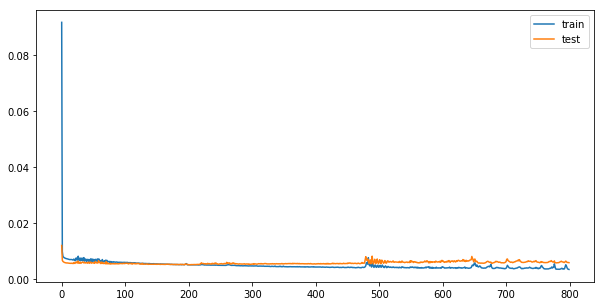

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


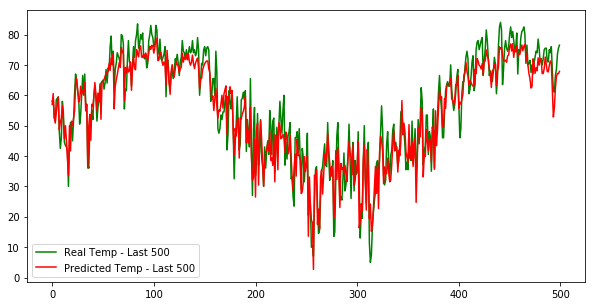

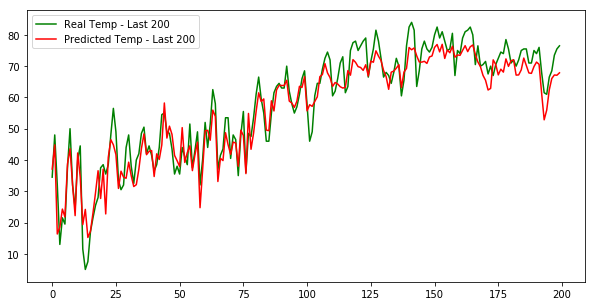

epoch_num: 800 neuron_num: 42
Test MSE: 57.429
Test RMSE: 7.578
Goodness of fit: 0.818
Mean Absolute Percentage Error: 16.783

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/800
 - 1s - loss: 0.0498 - val_loss: 0.0075
Epoch 2/800
 - 0s - loss: 0.0080 - val_loss: 0.0065
Epoch 3/800
 - 0s - loss: 0.0076 - val_loss: 0.0062
Epoch 4/800
 - 0s - loss: 0.0076 - val_loss: 0.0061
Epoch 5/800
 - 0s - loss: 0.0073 - val_loss: 0.0059
Epoch 6/800
 - 0s - loss: 0.0073 - val_loss: 0.0059
Epoch 7/800
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 8/800
 - 0s - loss: 0.0071 - val_loss: 0.0058
Epoch 9/800
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 10/800
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 11/800
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 12/800
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 13/800
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 14/800
 - 0s - loss: 0.0071 - val_loss: 0.0059
Epoch 15/80

Epoch 150/800
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 151/800
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 152/800
 - 0s - loss: 0.0053 - val_loss: 0.0055
Epoch 153/800
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 154/800
 - 0s - loss: 0.0054 - val_loss: 0.0056
Epoch 155/800
 - 0s - loss: 0.0053 - val_loss: 0.0056
Epoch 156/800
 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 157/800
 - 0s - loss: 0.0053 - val_loss: 0.0056
Epoch 158/800
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 159/800
 - 0s - loss: 0.0053 - val_loss: 0.0056
Epoch 160/800
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 161/800
 - 0s - loss: 0.0053 - val_loss: 0.0057
Epoch 162/800
 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 163/800
 - 0s - loss: 0.0053 - val_loss: 0.0055
Epoch 164/800
 - 0s - loss: 0.0053 - val_loss: 0.0056
Epoch 165/800
 - 0s - loss: 0.0053 - val_loss: 0.0055
Epoch 166/800
 - 0s - loss: 0.0053 - val_loss: 0.0056
Epoch 167/800
 - 0s - loss: 0.0053 - val_loss: 0.0055
Epoch 168/800
 - 0s - loss: 

Epoch 302/800
 - 0s - loss: 0.0050 - val_loss: 0.0068
Epoch 303/800
 - 0s - loss: 0.0050 - val_loss: 0.0069
Epoch 304/800
 - 0s - loss: 0.0050 - val_loss: 0.0067
Epoch 305/800
 - 0s - loss: 0.0049 - val_loss: 0.0071
Epoch 306/800
 - 0s - loss: 0.0049 - val_loss: 0.0069
Epoch 307/800
 - 0s - loss: 0.0049 - val_loss: 0.0071
Epoch 308/800
 - 0s - loss: 0.0052 - val_loss: 0.0078
Epoch 309/800
 - 0s - loss: 0.0052 - val_loss: 0.0075
Epoch 310/800
 - 0s - loss: 0.0055 - val_loss: 0.0086
Epoch 311/800
 - 0s - loss: 0.0057 - val_loss: 0.0071
Epoch 312/800
 - 0s - loss: 0.0053 - val_loss: 0.0072
Epoch 313/800
 - 0s - loss: 0.0056 - val_loss: 0.0075
Epoch 314/800
 - 0s - loss: 0.0057 - val_loss: 0.0067
Epoch 315/800
 - 0s - loss: 0.0055 - val_loss: 0.0069
Epoch 316/800
 - 0s - loss: 0.0056 - val_loss: 0.0067
Epoch 317/800
 - 0s - loss: 0.0055 - val_loss: 0.0064
Epoch 318/800
 - 0s - loss: 0.0054 - val_loss: 0.0061
Epoch 319/800
 - 0s - loss: 0.0053 - val_loss: 0.0061
Epoch 320/800
 - 0s - loss: 

Epoch 454/800
 - 0s - loss: 0.0043 - val_loss: 0.0059
Epoch 455/800
 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 456/800
 - 0s - loss: 0.0045 - val_loss: 0.0059
Epoch 457/800
 - 0s - loss: 0.0047 - val_loss: 0.0060
Epoch 458/800
 - 0s - loss: 0.0044 - val_loss: 0.0061
Epoch 459/800
 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 460/800
 - 0s - loss: 0.0043 - val_loss: 0.0058
Epoch 461/800
 - 0s - loss: 0.0045 - val_loss: 0.0059
Epoch 462/800
 - 0s - loss: 0.0043 - val_loss: 0.0058
Epoch 463/800
 - 0s - loss: 0.0042 - val_loss: 0.0058
Epoch 464/800
 - 0s - loss: 0.0042 - val_loss: 0.0058
Epoch 465/800
 - 0s - loss: 0.0042 - val_loss: 0.0058
Epoch 466/800
 - 0s - loss: 0.0043 - val_loss: 0.0058
Epoch 467/800
 - 0s - loss: 0.0042 - val_loss: 0.0059
Epoch 468/800
 - 0s - loss: 0.0042 - val_loss: 0.0058
Epoch 469/800
 - 0s - loss: 0.0042 - val_loss: 0.0058
Epoch 470/800
 - 0s - loss: 0.0042 - val_loss: 0.0059
Epoch 471/800
 - 0s - loss: 0.0042 - val_loss: 0.0059
Epoch 472/800
 - 0s - loss: 

Epoch 606/800
 - 0s - loss: 0.0038 - val_loss: 0.0061
Epoch 607/800
 - 0s - loss: 0.0037 - val_loss: 0.0061
Epoch 608/800
 - 0s - loss: 0.0037 - val_loss: 0.0060
Epoch 609/800
 - 0s - loss: 0.0038 - val_loss: 0.0061
Epoch 610/800
 - 0s - loss: 0.0037 - val_loss: 0.0061
Epoch 611/800
 - 0s - loss: 0.0038 - val_loss: 0.0061
Epoch 612/800
 - 0s - loss: 0.0038 - val_loss: 0.0062
Epoch 613/800
 - 0s - loss: 0.0038 - val_loss: 0.0060
Epoch 614/800
 - 0s - loss: 0.0037 - val_loss: 0.0059
Epoch 615/800
 - 0s - loss: 0.0037 - val_loss: 0.0060
Epoch 616/800
 - 0s - loss: 0.0037 - val_loss: 0.0060
Epoch 617/800
 - 0s - loss: 0.0038 - val_loss: 0.0061
Epoch 618/800
 - 0s - loss: 0.0038 - val_loss: 0.0060
Epoch 619/800
 - 0s - loss: 0.0038 - val_loss: 0.0061
Epoch 620/800
 - 0s - loss: 0.0038 - val_loss: 0.0063
Epoch 621/800
 - 0s - loss: 0.0039 - val_loss: 0.0061
Epoch 622/800
 - 0s - loss: 0.0038 - val_loss: 0.0064
Epoch 623/800
 - 0s - loss: 0.0039 - val_loss: 0.0060
Epoch 624/800
 - 0s - loss: 

Epoch 758/800
 - 0s - loss: 0.0035 - val_loss: 0.0063
Epoch 759/800
 - 0s - loss: 0.0034 - val_loss: 0.0063
Epoch 760/800
 - 0s - loss: 0.0037 - val_loss: 0.0066
Epoch 761/800
 - 0s - loss: 0.0042 - val_loss: 0.0071
Epoch 762/800
 - 0s - loss: 0.0038 - val_loss: 0.0062
Epoch 763/800
 - 0s - loss: 0.0034 - val_loss: 0.0062
Epoch 764/800
 - 0s - loss: 0.0034 - val_loss: 0.0062
Epoch 765/800
 - 0s - loss: 0.0035 - val_loss: 0.0064
Epoch 766/800
 - 0s - loss: 0.0034 - val_loss: 0.0063
Epoch 767/800
 - 0s - loss: 0.0034 - val_loss: 0.0063
Epoch 768/800
 - 0s - loss: 0.0035 - val_loss: 0.0063
Epoch 769/800
 - 0s - loss: 0.0034 - val_loss: 0.0063
Epoch 770/800
 - 0s - loss: 0.0034 - val_loss: 0.0064
Epoch 771/800
 - 0s - loss: 0.0034 - val_loss: 0.0064
Epoch 772/800
 - 0s - loss: 0.0034 - val_loss: 0.0064
Epoch 773/800
 - 0s - loss: 0.0034 - val_loss: 0.0065
Epoch 774/800
 - 0s - loss: 0.0035 - val_loss: 0.0066
Epoch 775/800
 - 0s - loss: 0.0037 - val_loss: 0.0062
Epoch 776/800
 - 0s - loss: 

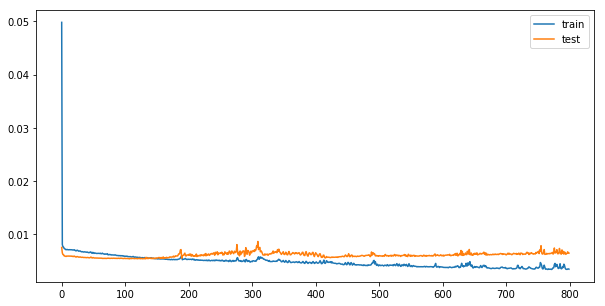

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


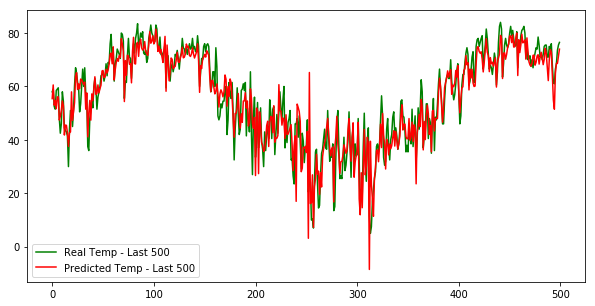

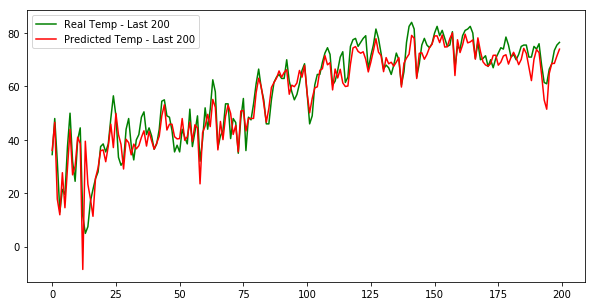

epoch_num: 800 neuron_num: 52
Test MSE: 61.773
Test RMSE: 7.860
Goodness of fit: 0.804
Mean Absolute Percentage Error: 16.915

________________________________________________________________________________


In [15]:
model_epoch = []
model_neuron = []
model_rmse = []
model_r2 = []
model_mse = []
model_mape = []


# Batch - number of training examples in a forward/backwards pass
batch_num = 27
# Number of model runs: 
model_runs = 1
# Number of neurons
neurons = [32, 42, 52]
# Epochs - number of forward and backward passes of all training examples
epochs = [200, 400, 600, 800]
for run in range(model_runs):
    for epoch_num in epochs:
        for neuron_num in neurons:  
            # reshape the X input to be 3D [samples, timesteps, features]
            train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
            test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
            
            # Fit the model: 
            modelCNN3 = fit_model(train_X, train_y, test_X, test_y, batch_num, epoch_num, neuron_num)
            # Make the prediction on test data
            yhat = modelCNN3.predict(test_X, batch_size=batch_num)
            print('Model predictions shape: ', yhat.shape)
        
        
            # print('Scale back to get non scaled scores:') 
            # print('Concat predicted test y and x, then scale back:')
            test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
            yhat_concat = concatenate((yhat, test_X[:, -2:]), axis=1)
            yhat_concat_inverse  = scaler.inverse_transform(yhat_concat)
            predictions  = yhat_concat_inverse[:,0]
        
        
            # print('Concat real test y and x, then scale back:')
            test_y = test_y.reshape((len(test_y), 1))
            y_concat = concatenate((test_y, test_X[:, -2:]), axis=1)
            y_concat_inverse = scaler.inverse_transform(y_concat)
            scaledBack_test_y = y_concat_inverse[:,0]
        
        
            # Real vs Predicted values: 
            # Because X (and thus predictions) is one day behind Y. The time series plot look a bit off. 
            # Let's place back the data so we can see the plots better
            # The prediction “prediction” is one index ahead of real output “scaledBack_test_y”.
            plot_y = scaledBack_test_y[:-1]
            plot_predictions = predictions[1:]

        
            pyplot.plot(plot_y[-500:], color='green', label = 'Real Temp - Last 500')
            pyplot.plot(plot_predictions[-500:], color='red', label = 'Predicted Temp - Last 500')
            pyplot.legend()
            pyplot.show()
        
            pyplot.plot(plot_y[-200:], color='green', label = 'Real Temp - Last 200')
            pyplot.plot(plot_predictions[-200:], color='red', label = 'Predicted Temp - Last 200')
            pyplot.legend()
            pyplot.show()
            
            # Score the test: 
            print("epoch_num:", epoch_num, "neuron_num:", neuron_num )
            mse = mean_squared_error(scaledBack_test_y, predictions)
            print('Test MSE: %.3f' % mse)
            rmse = sqrt(mean_squared_error(scaledBack_test_y, predictions))
            print('Test RMSE: %.3f' % rmse)
            r2score = r2_score(scaledBack_test_y, predictions)
            print('Goodness of fit: %.3f' % r2score)
            model_mse.append(mse)
            model_rmse.append(rmse)
            model_r2.append(r2score)
            model_epoch.append(epoch_num)
            model_neuron.append(neuron_num,)
            # Mean Absolute Percentage Error
            # http://mariofilho.com/create-simple-machine-learning-model-predict-time-series/
            # MAPE, as it is scale-independent 
            # and represents the ratio of error to actual values as a percent
            def mape(y_pred,y_true):
                return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            mapescore = mape(predictions,scaledBack_test_y)
            model_mape.append(mapescore)
            print('Mean Absolute Percentage Error: %.3f' % mapescore)
            print()
            print('________________________________________________________________________________')
            #
            #model_autocorr = []
            #model_normal = []
            #model_variance = []
            
        

In [16]:
predictionSummary = pd.DataFrame({
                                  'Epochs':np.array(model_epoch),
                                  'Neurons':np.array(model_neuron),
                                  'R2':np.array(model_r2),
                                  'RMSE':np.array(model_rmse),
                                  'MSE':np.array(model_mse),
                                  'MAPE':np.array(model_mape),})
                                  

print('CNN Lag3 Results - Sorted by R2 (Coefficient Of Determination - Goodness of fit) :')
print()
print(predictionSummary.sort_values(by=['R2'], ascending=False)) 
# Only for more than one number of model runs: 
# print()
# print(predictionSummary.describe())



CNN Lag3 Results - Sorted by R2 (Coefficient Of Determination - Goodness of fit) :

    Epochs  Neurons        R2      RMSE        MSE       MAPE
6      600       32  0.836832  7.173646  51.461197  15.114038
0      200       32  0.834562  7.223358  52.176895  15.012632
1      200       42  0.833927  7.237210  52.377205  14.797550
4      400       42  0.828234  7.360223  54.172890  15.407573
2      200       52  0.827617  7.373423  54.367363  15.261811
3      400       32  0.824656  7.436480  55.301228  15.349957
10     800       42  0.817909  7.578211  57.429276  16.782868
8      600       52  0.817090  7.595221  57.687382  16.198911
5      400       52  0.815735  7.623315  58.114925  16.577148
7      600       42  0.806970  7.802512  60.879192  16.689552
9      800       32  0.804423  7.853815  61.682415  17.404652
11     800       52  0.804135  7.859598  61.773285  16.914736


In [17]:
predictionSummary.to_csv('./data/CNNExploreSummary.csv')
print(datetime.now() - startTime)

0:13:31.741527
